In [1]:
# notebook for pca / tsne clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 300

In [15]:
# from sklearn.model_selection import train_test_split

# df = pd.read_csv("data/track_features.csv.gz")
# df.shape

# df = df.iloc[:, 1:]
# df.head()

# train, test = train_test_split(df, test_size=0.2, random_state=88)
# train.to_csv("data/train.csv.gz", compression="gzip")
# test.to_csv("data/test.csv.gz", compression="gzip")

In [2]:
train = pd.read_csv("data/train.csv.gz")
test = pd.read_csv("data/test.csv.gz")

train = train.iloc[:, 1:]
test = test.iloc[:, 1:]

train["artists"] = train["artists"].str[1:-1].str.replace("'", "").str.split(",")
train["artist_ids"] = train["artist_ids"].str[1:-1].str.replace("'", "").str.split(",")

test["artists"] = test["artists"].str[1:-1].str.replace("'", "").str.split(",")
test["artist_ids"] = test["artist_ids"].str[1:-1].str.replace("'", "").str.split(",")

In [3]:
y_train = train["decade"]
y_test = test["decade"]

X_train = train.drop(["year", "decade"], axis=1)
X_test = test.drop(["year", "decade"], axis=1)

In [4]:
continuous_cols = ["explicit", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "num_artists"]
X_train = X_train[continuous_cols + ["primary_artist"]]

In [5]:
import category_encoders as ce

te = ce.TargetEncoder()
te.fit(X_train["primary_artist"], train["year"])

X_train["primary_artist"] = te.transform(X_train["primary_artist"])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [7]:
X_train_scaled.shape

(771818, 16)

In [8]:
y_train.shape

(771818,)

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
Xt = pca.fit_transform(X_train_scaled)

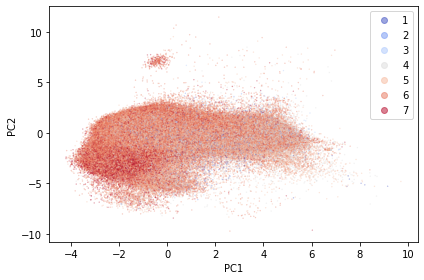

In [10]:
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_train, s=0.1, cmap="coolwarm", alpha=0.5)
plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y_train)))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

<AxesSubplot: >

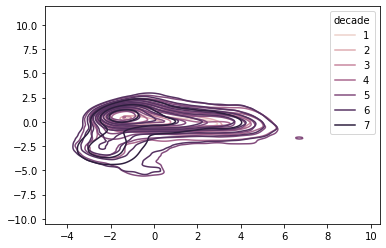

In [11]:
sns.kdeplot(x=Xt[:, 0], y=Xt[:, 1], hue=y_train)

In [12]:
print(pca.explained_variance_ratio_)

[0.2215336  0.09194807 0.08485551 0.07390774 0.06895608 0.0635696
 0.05746754 0.05487941 0.05208792 0.05117119 0.04664972 0.04485735
 0.03680415 0.02416055 0.01964772 0.00750385]


In [13]:
abs(pca.components_[0])

array([0.15927968, 0.29867494, 0.45382235, 0.02378148, 0.45395855,
       0.01081525, 0.12654803, 0.41103463, 0.25629172, 0.10449578,
       0.31954315, 0.17068553, 0.06136795, 0.1577072 , 0.20061253,
       0.10495049])

In [14]:
abs(pca.components_[1])

array([0.44784158, 0.31841462, 0.21627909, 0.03976335, 0.18189401,
       0.05750336, 0.54292742, 0.22649346, 0.22984769, 0.04854484,
       0.1493268 , 0.2501242 , 0.28297182, 0.05159777, 0.21055686,
       0.01067668])

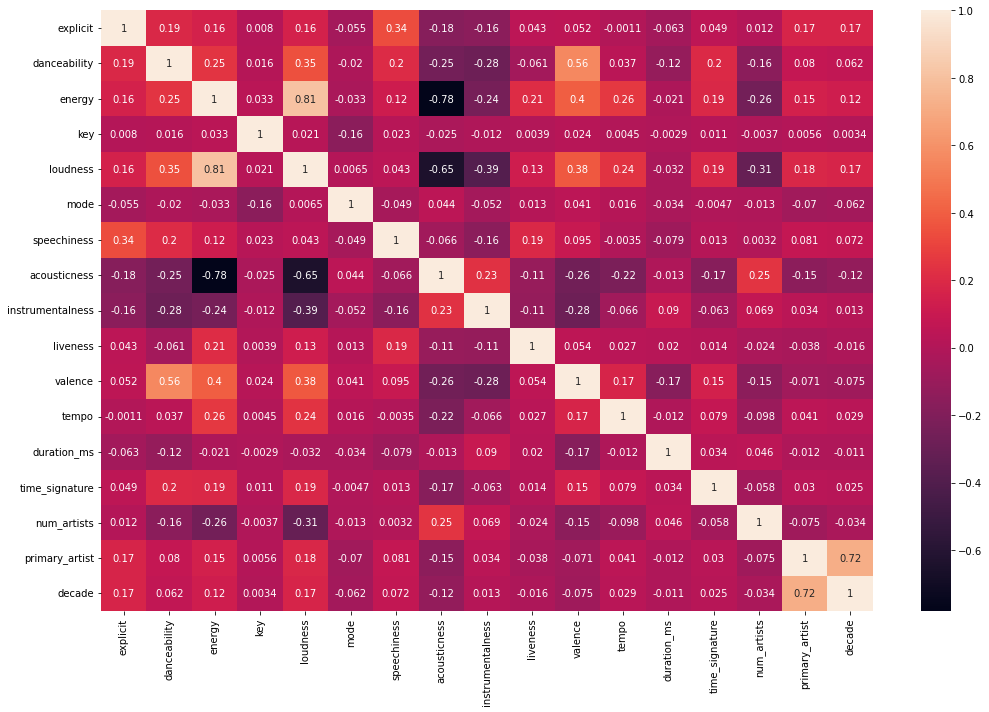

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), annot=True)
plt.tight_layout()